In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyclifford as pc
from quantum_model import Quantum_Strategy
from tqdm import tqdm

In [42]:
n_list = [10, 20, 50, 100]
res = {}
for n in tqdm(n_list):
    res[n] = []
    for noise in np.linspace(0, 0.4, 40):
        qs = Quantum_Strategy(n, noise=noise)
        data = qs.produce_data(100, progress_bar=False)
        check = qs.check_input_output(data['X'], data['Y'], flatten=False)
        score = np.mean(np.sum(check, axis=-1) > 0.8 * n)
        std = np.std(check)
        # print(f"noise: {noise:.2f}, score: {score:.2f}")
        res[n].append([noise, score, std])
    res[n] = np.array(res[n])

100%|██████████| 4/4 [04:06<00:00, 61.68s/it]


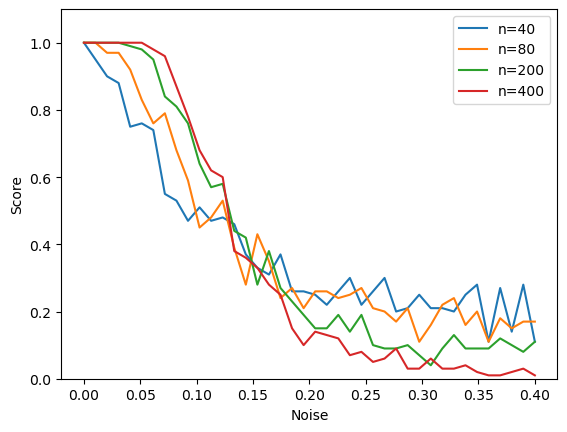

In [44]:
for n in n_list:
    # plt.errorbar(res[n][:, 0], res[n][:, 1], yerr=res[n][:, 2], label=f"n={n}")
    plt.plot(res[n][:, 0], res[n][:, 1], label=f"n={4 * n}")
plt.legend()
plt.xlabel("Noise")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.show()